In [1]:
# Import all the important libraries
import numpy as np
import numba as nb 
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib

from sys_pde_no_growth_Lmx1a_GRN import *

In [14]:
# System Params - Same for all the species
sys_params = np.zeros(2)
sys_params[0] = 2                   # Hill coefficient
sys_params[1] = 0.7                 # BMP(t=0)


## BMP
b_params = np.zeros(7)
b_params[0] = 0.100                  # a_b_s
b_params[1] = 14.53**sys_params[0]   # K_b_s (with exponent)
b_params[2] = 0.1                    # a_b_w
b_params[3] = 58.57**sys_params[0]   # K_b_w (with exponent)
b_params[4] = 0.36                   # a_b_l
b_params[5] = 12.7**sys_params[0]    # K_b_l
b_params[6] = 0.115                  # d_b

# BMP i
i_params = np.zeros(3)
i_params[0] = 0.1                   # a_i_s
i_params[1] = 0.10**sys_params[0]    # K_i_s
i_params[2] = 0.034                  # d_i

# pSmad
s_params = np.zeros(4)
s_params[0] = 18                   # a_s_b
s_params[1] = 0.3**sys_params[0]     # K_s_b
s_params[2] = 1.375**sys_params[0]   # K_s_i
s_params[3] = 1.44                   # d_s

# Lmx1a
l_params = np.zeros(5)
l_params[0] = 0.1                    # a_l_s
l_params[1] = 0.1**sys_params[0]     # K_l_s (with exponent)
l_params[2] = 15.39                  # a_l_w
l_params[3] = 6.960**sys_params[0]   # K_l_w (with exponent)
l_params[4] = 0.115                  # d_l

# Wnt
w_params = np.zeros(5)
w_params[0] = 0.27                   # a_w_l
w_params[1] = 0.664**sys_params[0]   # K_w_l (with exponent)
w_params[2] = 0.1                    # a_w_s
w_params[3] = 5.89**sys_params[0]    # K_w_s (with exponent)
w_params[4] = 0.125                  # d_w

In [15]:
# Define all the simulations params
sol_params = np.zeros(3)
sol_params[0] = 0.01 # dt 
sol_params[1] = 144/sol_params[0] # Total time, T
sol_params[2] = 1/sol_params[0] # Delta t (snapshot saving time)

In [16]:
# Get the initial conditions
b, i, s, l, w = create_IC_1(sys_params)

In [17]:
# Simulate the dynamics
data_b_time, data_i_time, data_s_time, data_l_time, data_w_time = run_and_save_sys(b, i, s, l, w, 
                     b_params, i_params, s_params, l_params, w_params, 
                     sys_params, sol_params)

In [18]:
# Experimental results
t_measured = np.array([ 0,   0.5,  0.75, 1.0,   2.0,  3.0,  4.0,  5.0,  6.0,  7.,   8.0,  24.0,  48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  110,   126,   132,   144])
x2_measured = np.array([0.0, 0.68, 0.77, 1.283, 1.12, 1.84, 1.37, 1.29, 1.80, 1.03, 0.96, 0.012, 0.12,  0.40,  0.60,  0.7,   0.80,  0.90,  0.95,  1.00,  1.00,  1.00,  1.00,  1.00])
x3_measured = np.array([0,   0.0,  0.0,  0.0,   0.0,  0.0,  0.0,  0.0,  0.0,  0.,   0.0,  0.0,   48.0,  56.0,  64.0,  67.0,  70.0,  72.0,  80.0,  96.0,  96.0,  96.0,  96.0,  96.0])
x2_measured /= np.max(x2_measured)
x3_measured /= np.max(x3_measured)

In [19]:
# Plot all the conncs as a function of time over one axis from the center
b_concs_t = data_b_time/np.max(data_b_time)
i_concs_t = data_i_time/np.max(data_i_time)
s_concs_t = data_s_time/np.max(data_s_time)
l_concs_t = data_l_time/np.max(data_l_time)
w_concs_t = data_w_time/np.max(data_w_time)

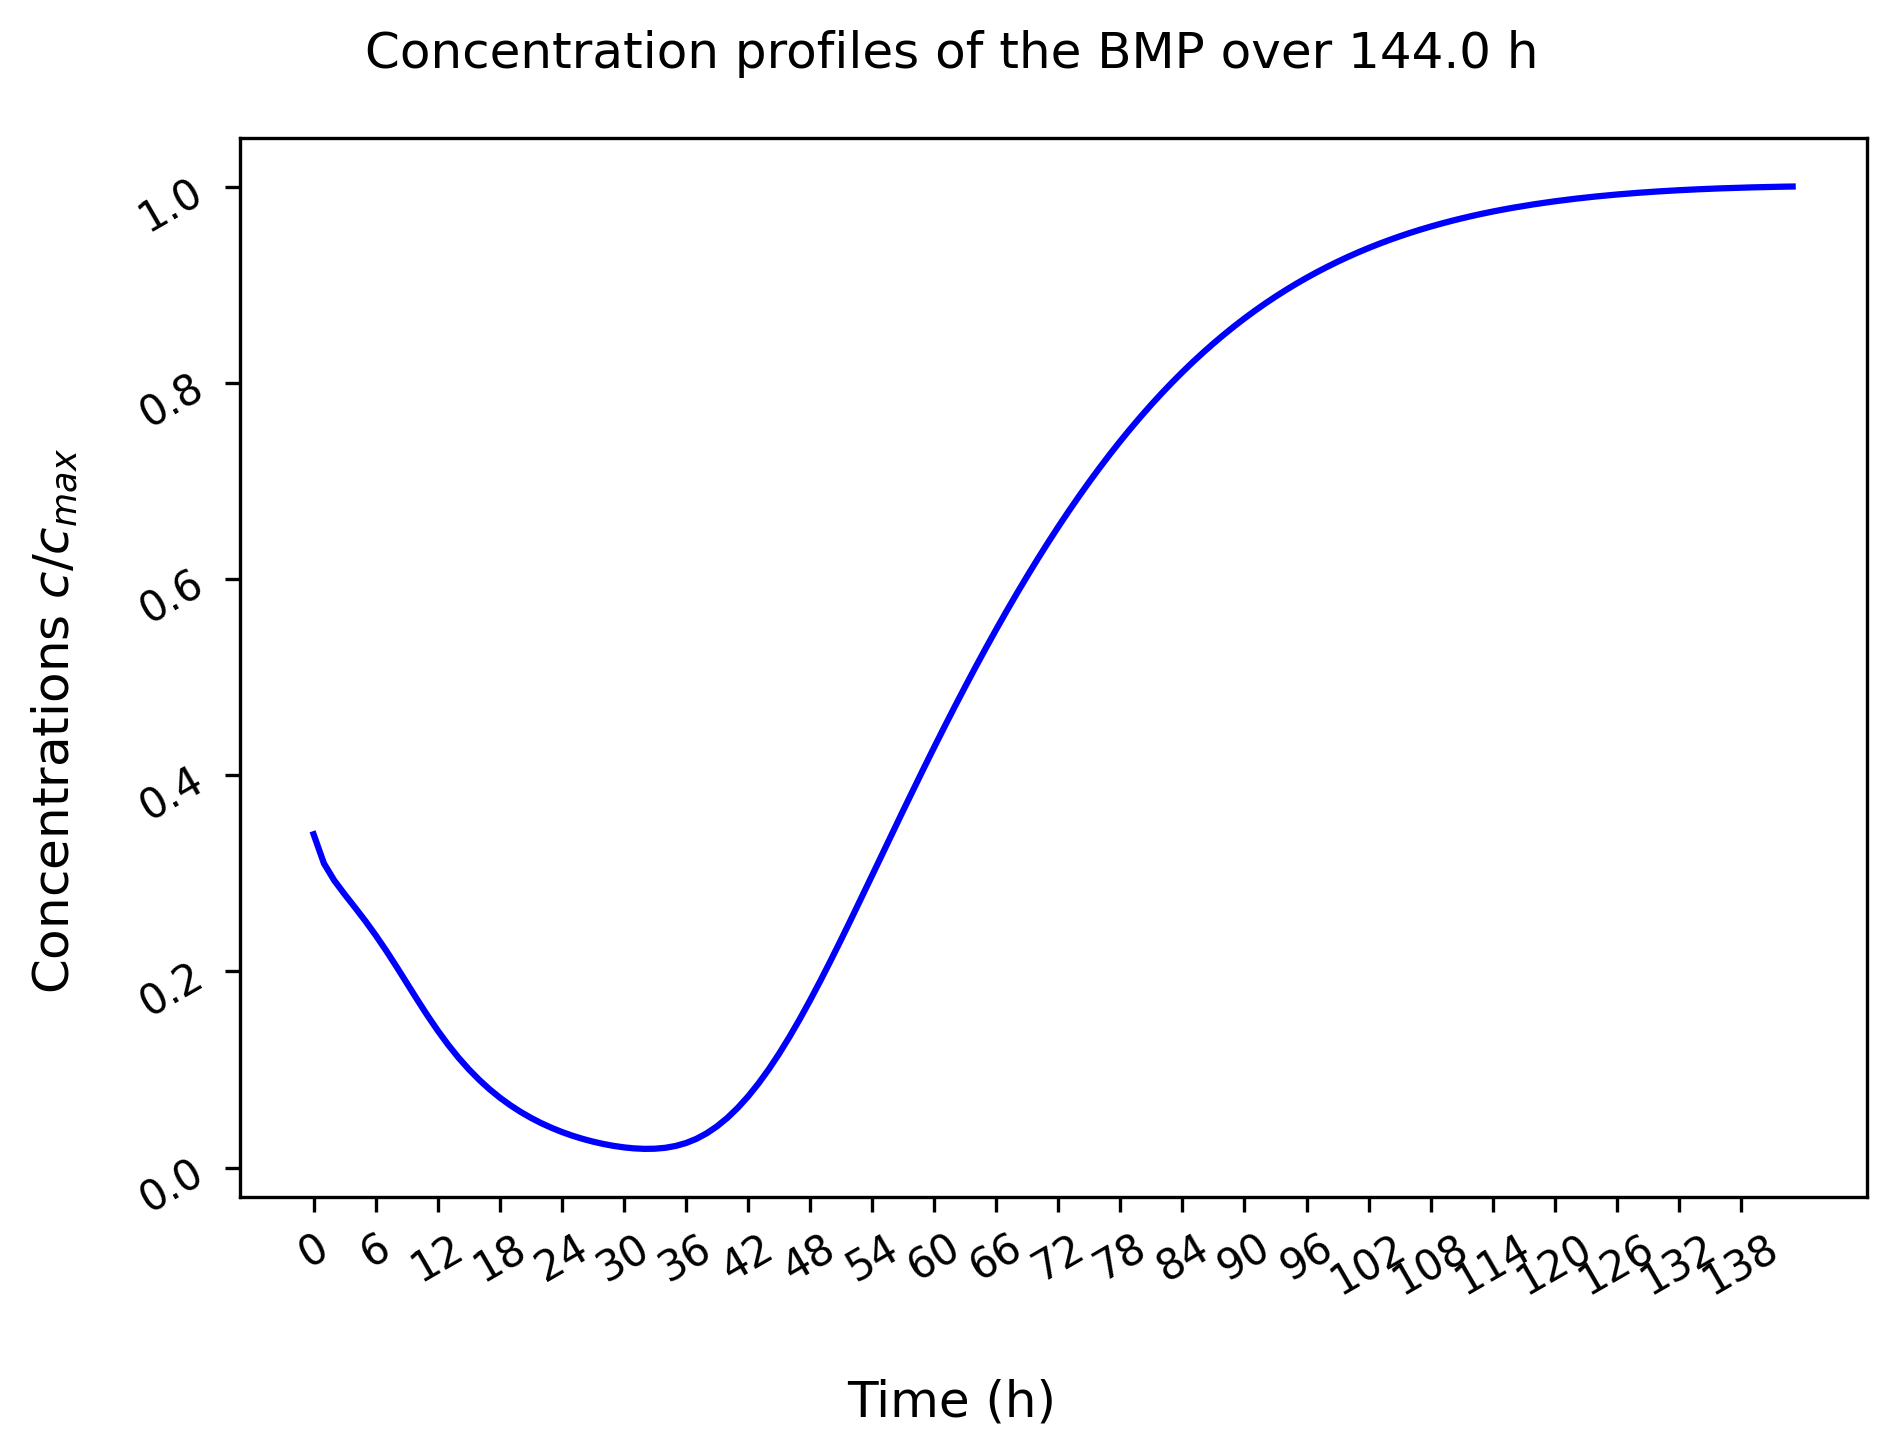

In [20]:
# Plot BMP dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_b_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], b_concs_t, color = "Blue")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the BMP over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

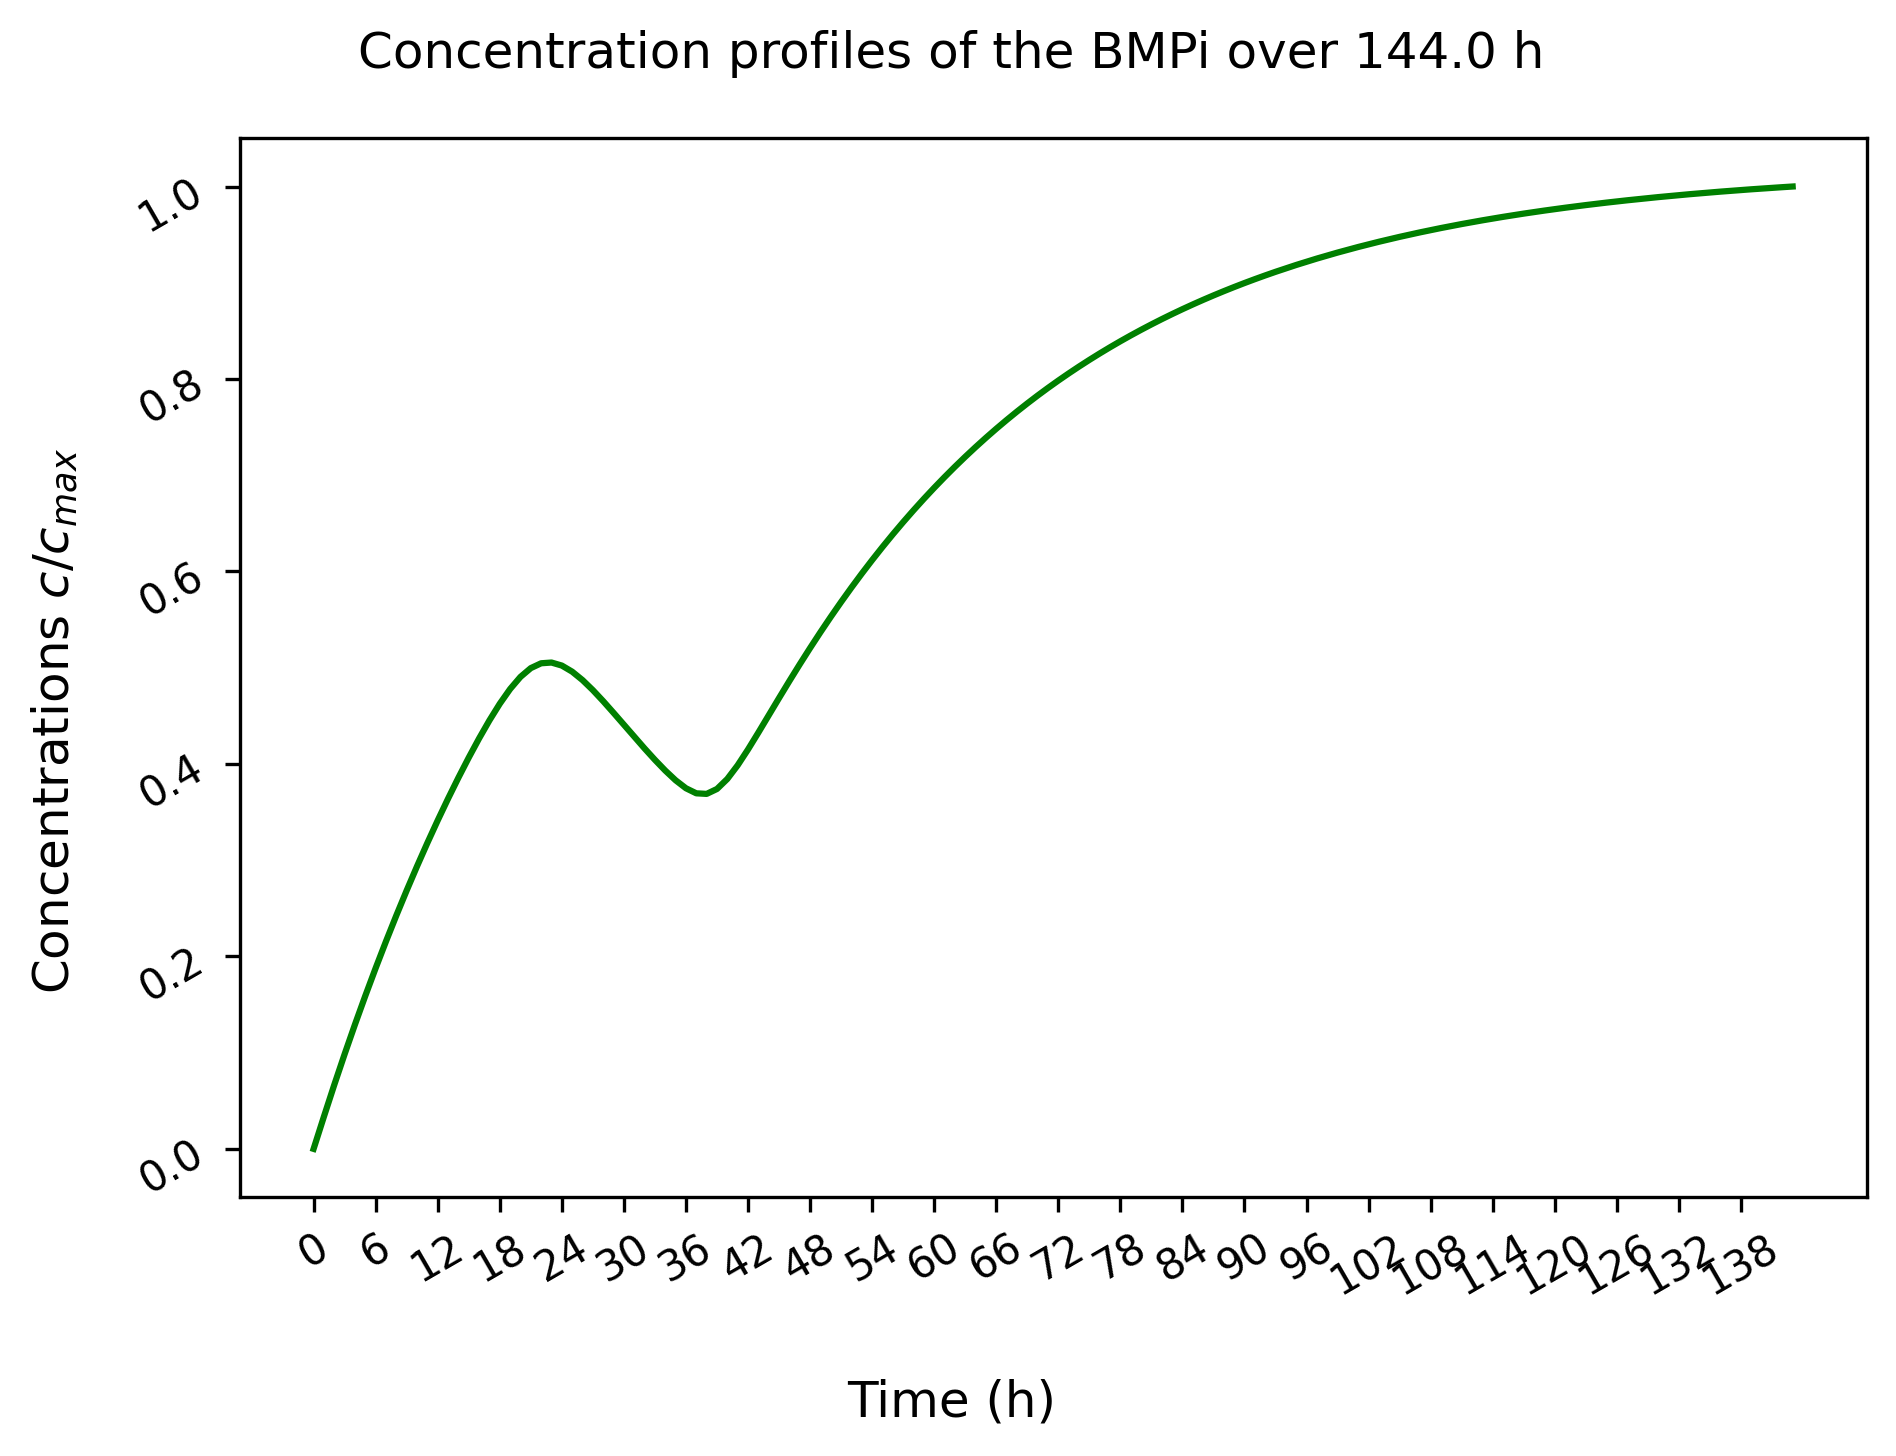

In [21]:
# Plot BMPi dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_i_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], i_concs_t, color = "Green")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the BMPi over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

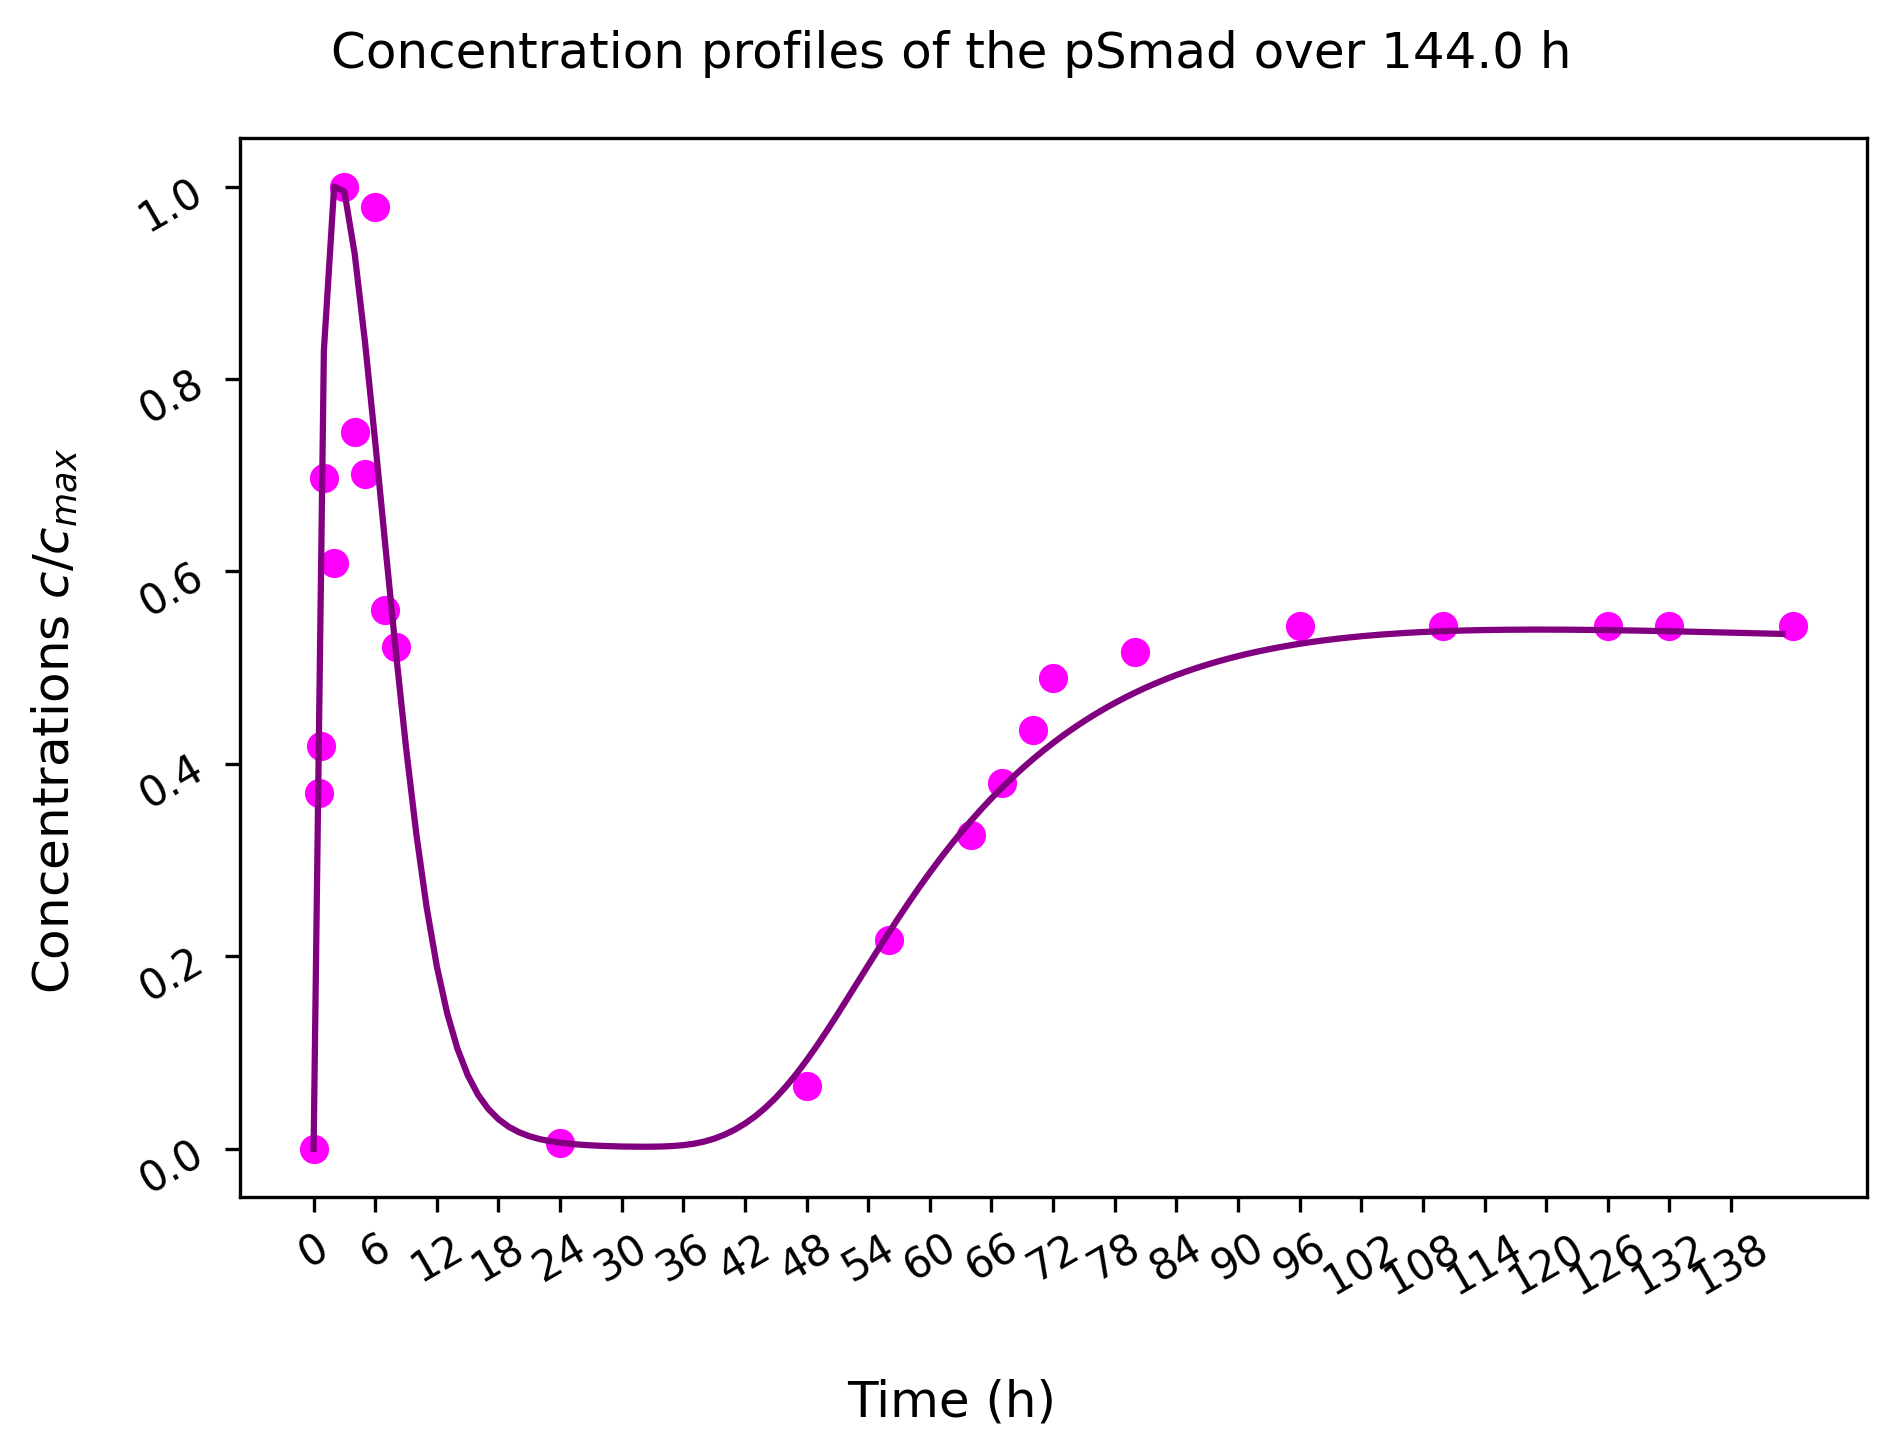

In [22]:
# Plot pSmad dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_s_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], s_concs_t, color = "Purple")
axes.scatter(t_measured, x2_measured, color = "magenta")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the pSmad over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

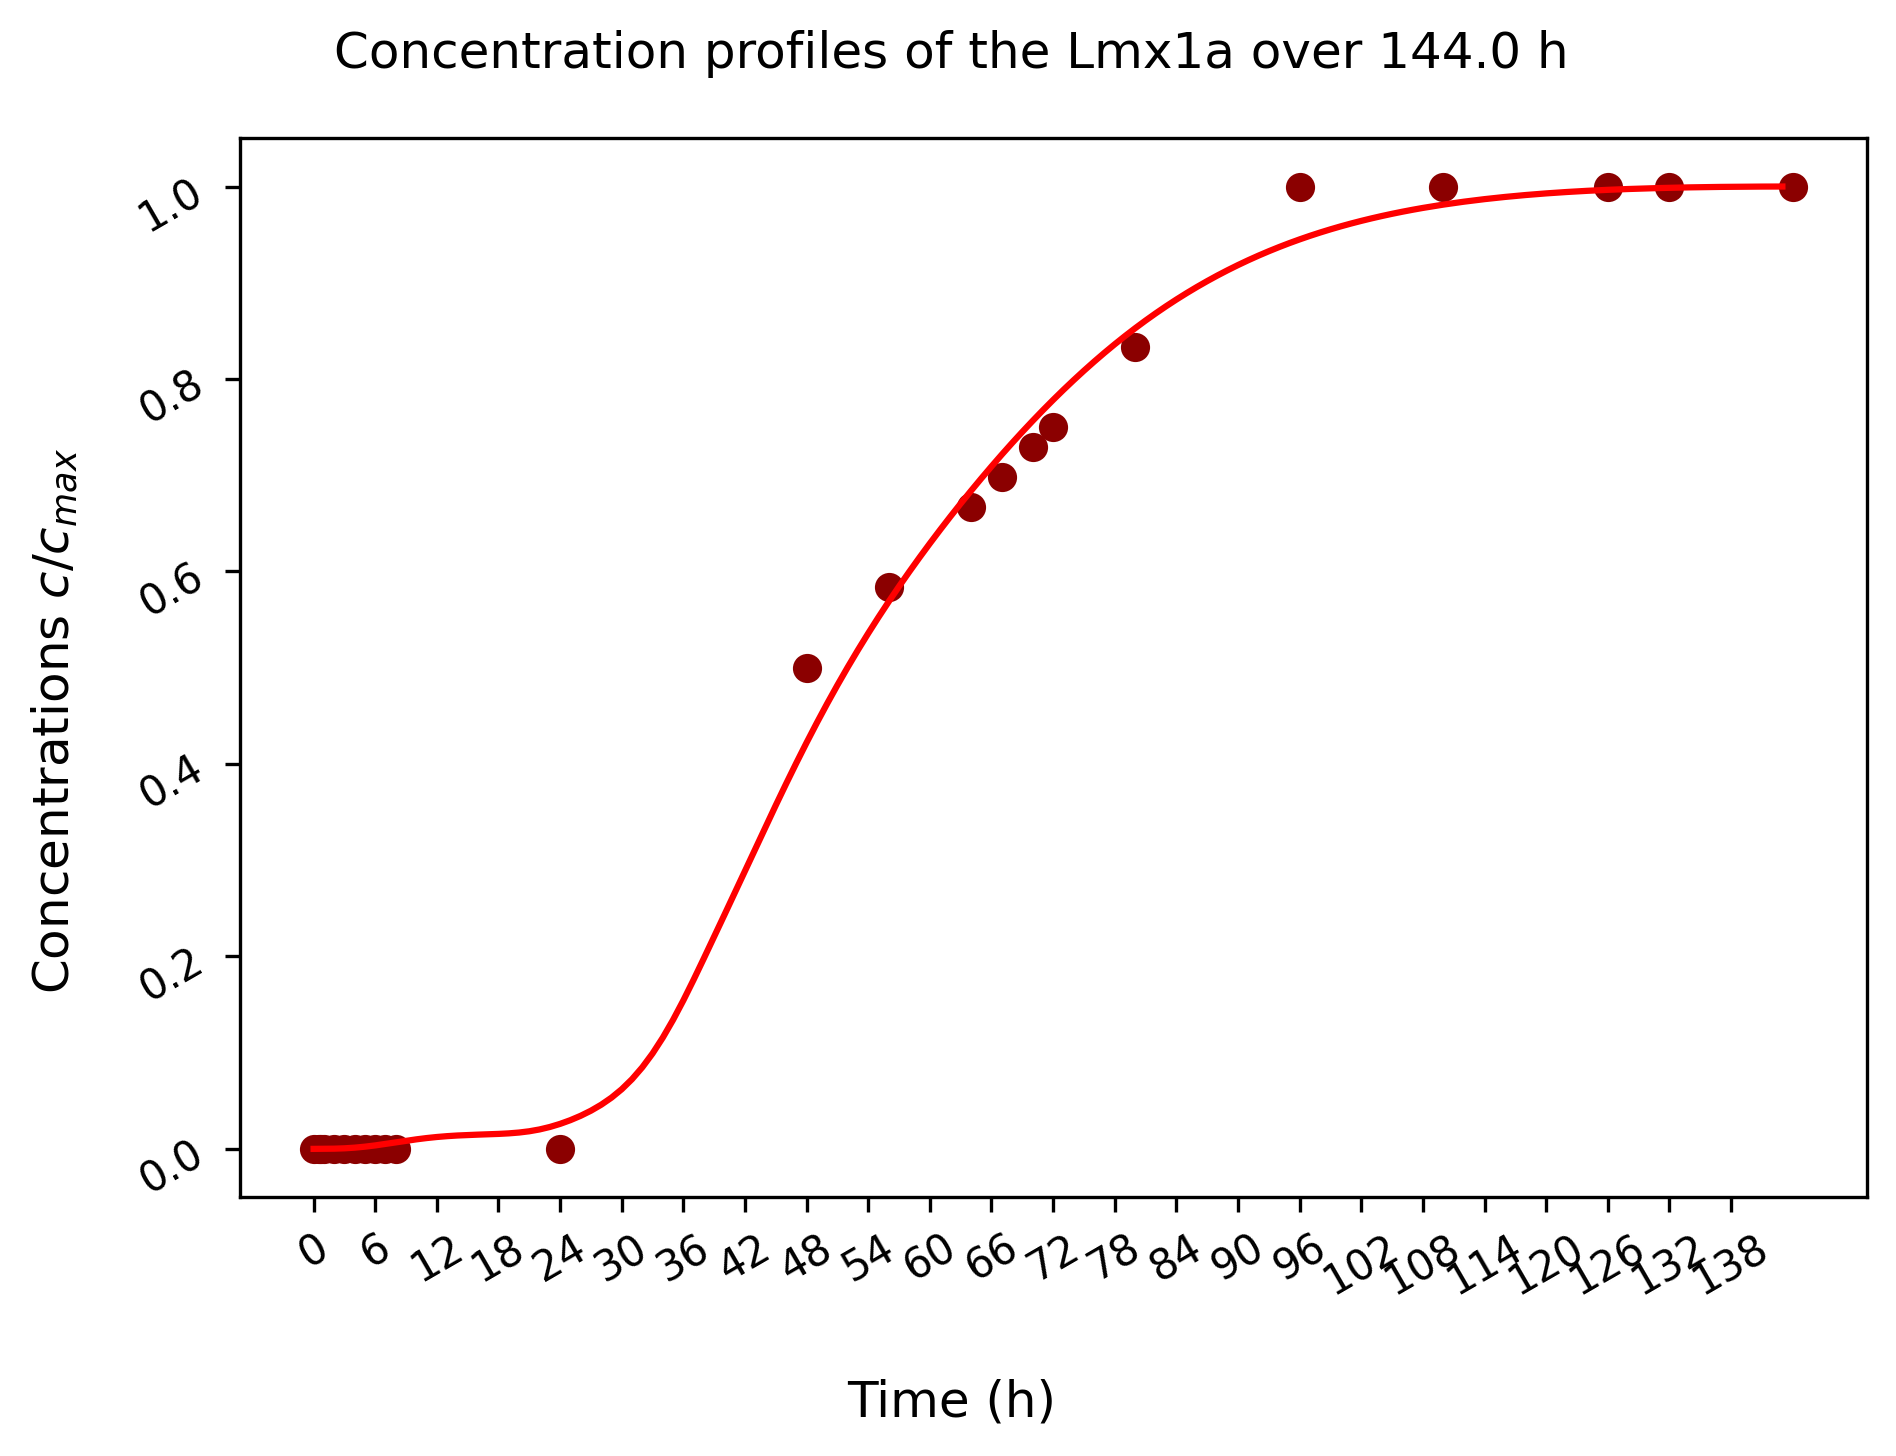

In [23]:
# Plot Lmx1a dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_s_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], l_concs_t, color = "Red")
axes.scatter(t_measured, x3_measured, color = "darkred")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the Lmx1a over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();

In [13]:
# Plot Wnt dynamics
fig, axes = plt.subplots(1, 1, dpi=300)
delta_T = data_s_time.shape[0]

axes.plot(np.arange(delta_T)[:]*sol_params[0]*sol_params[2], w_concs_t, color = "orange")
axes.set_xticks(np.arange(0, delta_T, 6))
axes.tick_params(axis='both', which='major', labelsize=10, rotation=30)

fig.supylabel(r'Concentrations $c/c_{max}$')
fig.supxlabel('Time (h)')
plt.suptitle("Concentration profiles of the Wnt over {} h".format(sol_params[1]*sol_params[0]));
fig.tight_layout();